In [5]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [8]:
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

(2000, 1800, 3)


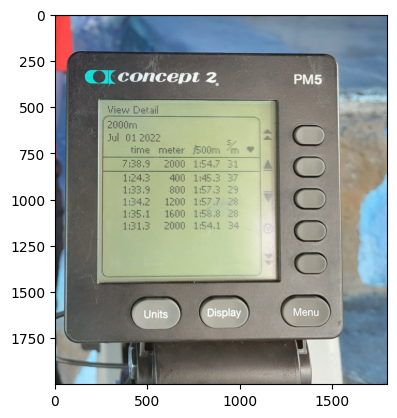

In [34]:
file_name = 'temp/erg_02.jpeg'
image = cv2.imread(file_name)
image = image[1000:3000, 1700:3500]
print(image.shape)
plt.imshow(image)

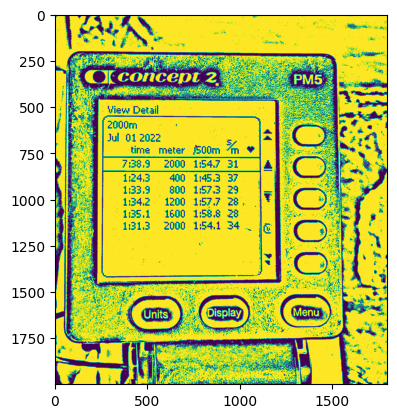

In [35]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

bw_gaussian = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,111,5)
cv2.imwrite("temp/bw_gaussian.jpg", bw_gaussian)
plt.imshow(bw_gaussian)


In [18]:
# display('temp/bw_gaussian.jpg')

2860.0
27885.5
40502.5
5031.0
12309.0
3253966.0


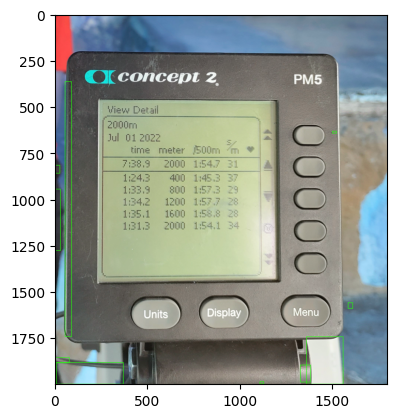

In [37]:
cnts = cv2.findContours(bw_gaussian, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
img = image.copy()
for cnt in cnts:
    x, y, w, h = cv2.boundingRect(cnt)
    if h > 10 and 20 < w < 400:
        roi = img[y:y+h, x:x+h]
        cv2.rectangle(img, (x, y), (x+w, y+h), (36, 255, 12), 2)
    approx = cv2.contourArea(cnt)
    if approx > 1000:
        print(approx)
plt.imshow(img)

## Trying different threshold techniques and values

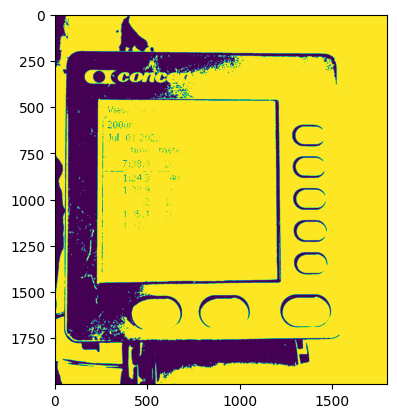

In [42]:
inverted_image = cv2.bitwise_not(image)
gray2 = cv2.cvtColor(inverted_image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray2, (7, 7), 0)
# thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

(T, threshInv) = cv2.threshold(blurred, 160, 255, cv2.THRESH_BINARY_INV)
plt.imshow(threshInv)
# plt.imshow(gray2)

1044.0
3720.0
76364.5
29529.0
1856.5
10495.5
2792039.0


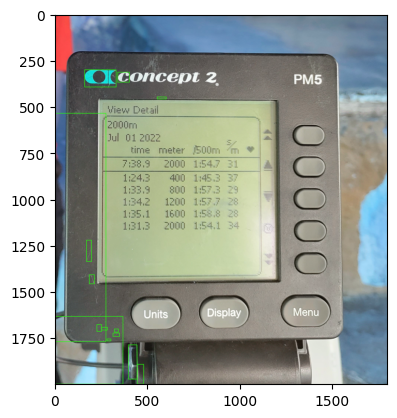

In [43]:
cnts = cv2.findContours(threshInv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
img = image.copy()
for cnt in cnts:
    x, y, w, h = cv2.boundingRect(cnt)
    if h > 10 and 20 < w < 400:
        roi = img[y:y+h, x:x+h]
        cv2.rectangle(img, (x, y), (x+w, y+h), (36, 255, 12), 2)
    approx = cv2.contourArea(cnt)
    if approx > 1000:
        print(approx)
plt.imshow(img)

## Method 3

In [48]:
def bgremove2(myimage):
    # First Convert to Grayscale
    myimage_grey = cv2.cvtColor(myimage, cv2.COLOR_BGR2GRAY)
 
    ret,baseline = cv2.threshold(myimage_grey,127,255,cv2.THRESH_TRUNC)
 
    ret,background = cv2.threshold(baseline,126,255,cv2.THRESH_BINARY)
 
    ret,foreground = cv2.threshold(baseline,126,255,cv2.THRESH_BINARY_INV)
 
    foreground = cv2.bitwise_and(myimage,myimage, mask=foreground)  # Update foreground with bitwise_and to extract real foreground
 
    # Convert black and white back into 3 channel greyscale
    background = cv2.cvtColor(background, cv2.COLOR_GRAY2BGR)
 
    # Combine the background and foreground to obtain our final image
    finalimage = background+foreground
    return finalimage

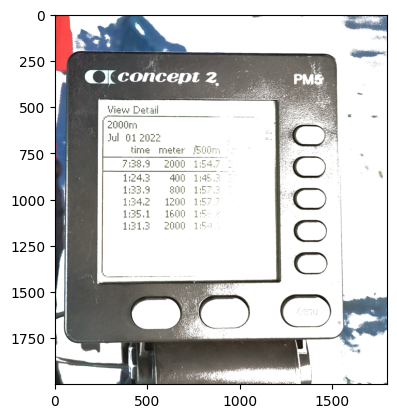

In [49]:
img2 = image.copy()
m3img = bgremove2(img2)
plt.imshow(m3img)